# 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Loading the Data

In [ ]:
# Load dataset (replace with actual file path)
df = pd.read_csv("flight_booking.csv")
df

In [ ]:
# Remove unnecessary column (if any)
df = df.drop(columns=["Unnamed: 0"])
df

In [ ]:
# Overview of the dataset
print(df.shape)
print(df.info())
print(df.describe())

In [ ]:
# Check for missing values
print(df.isnull().sum())

# 3. Data Visualization

### Price variation with airlines

C:\Users\jjk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jjk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


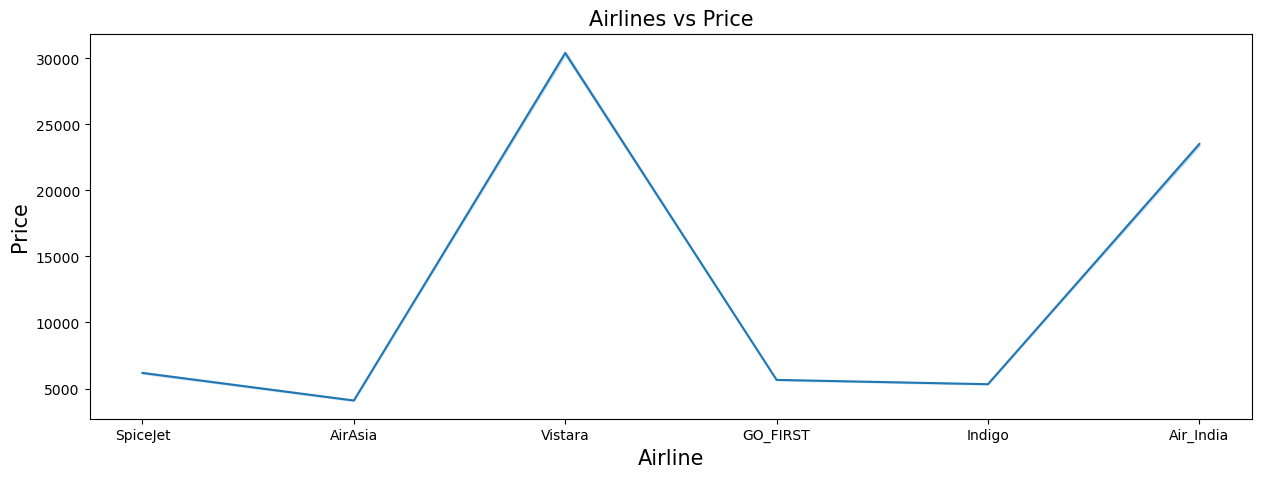

In [7]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=df['airline'], y=df['price'])
plt.title('Airlines vs Price', fontsize = 15)
plt.xlabel("Airline", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.show()

### Price vs Days Left

C:\Users\jjk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jjk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


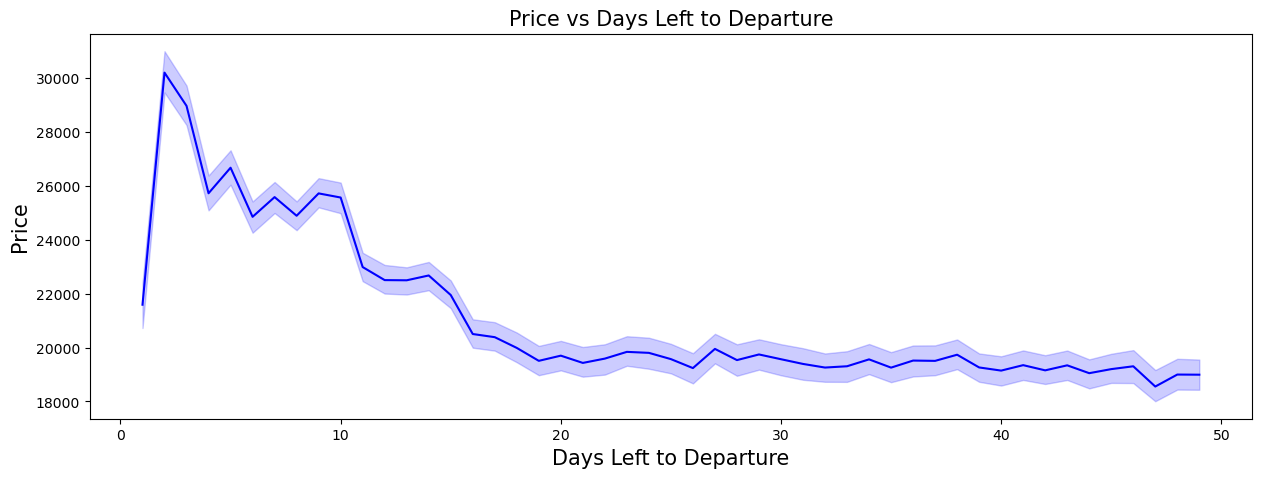

In [8]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='days_left', y='price', color='blue', data=df)
plt.title('Price vs Days Left to Departure', fontsize = 15)
plt.xlabel("Days Left to Departure", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.show()

### Price range of all flights

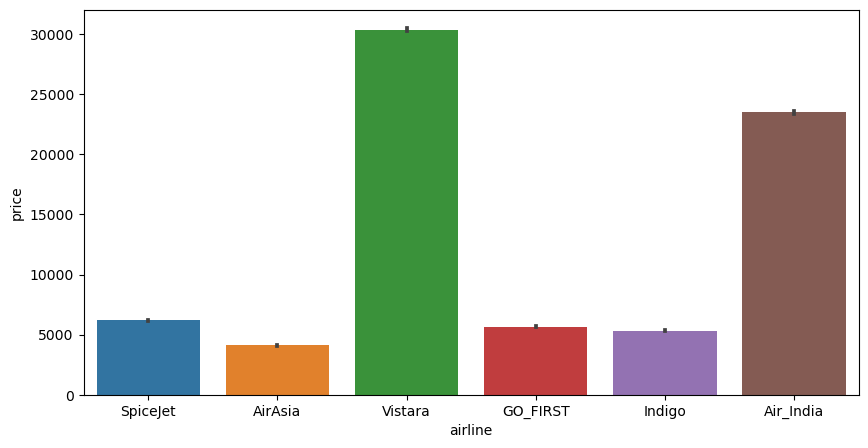

In [9]:
plt.figure(figsize=(10, 5))
sns.barplot(x='airline', y='price', data=df)
plt.show()

### Economy vs Business Class Prices

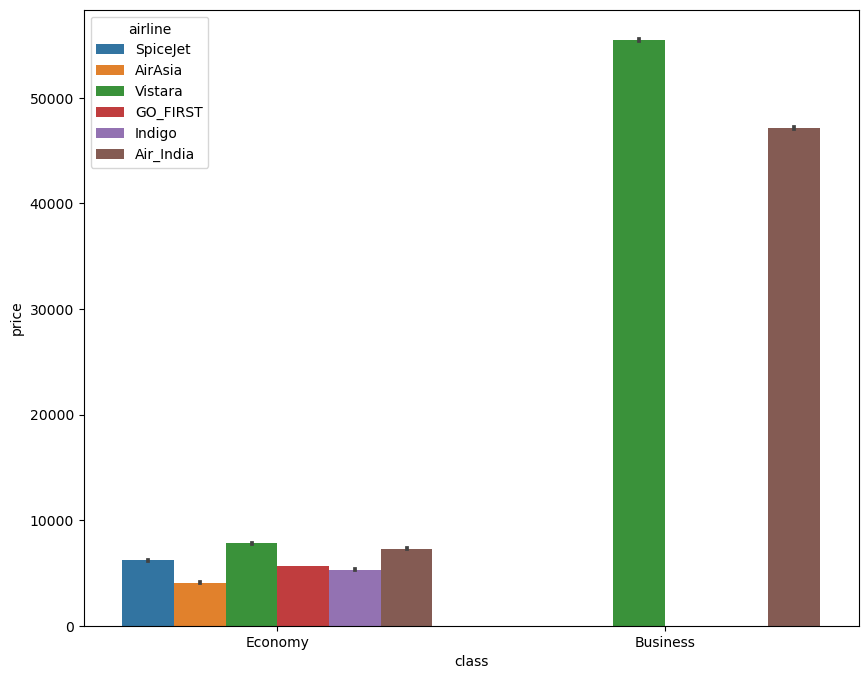

In [10]:
plt.figure(figsize=(10, 8))
sns.barplot(x='class', y='price', data=df, hue = 'airline')
plt.show()

### Range of price of flights with source and destination city according to the days left

C:\Users\jjk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jjk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jjk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\jjk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple

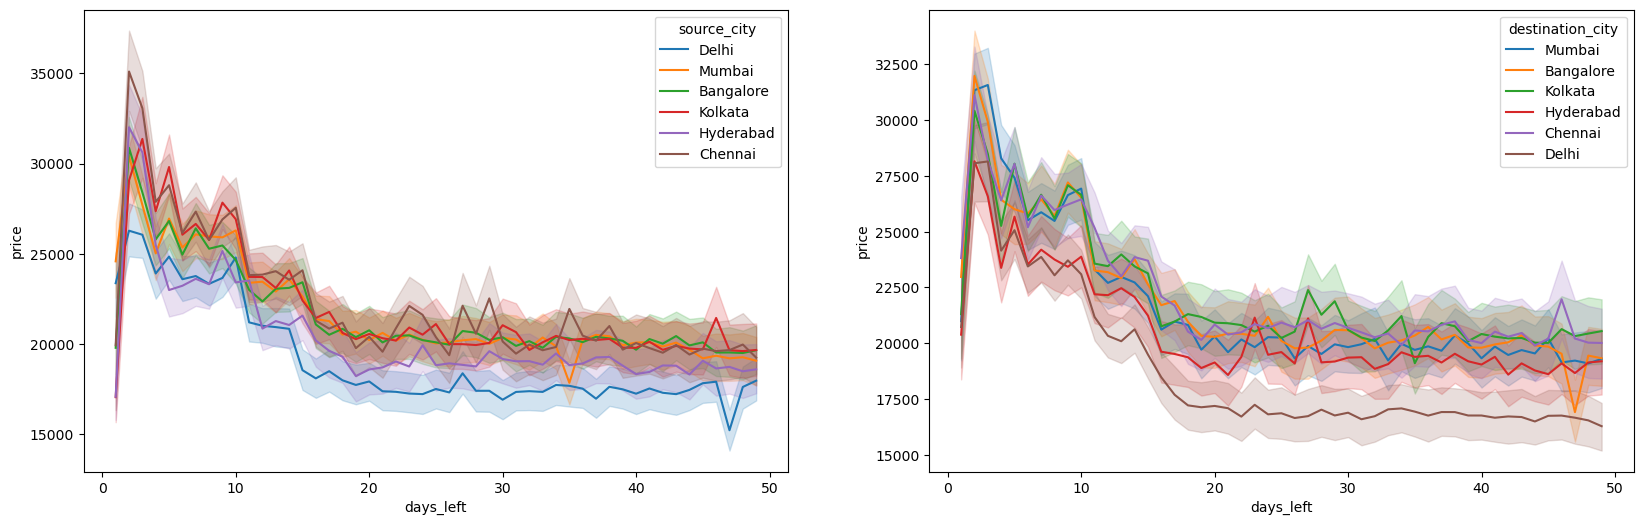

In [11]:
fig,ax=plt.subplots(1,2,figsize = (20,6))
sns.lineplot(x='days_left', y='price', data=df, hue='source_city', ax=ax[0])
sns.lineplot(x='days_left', y='price', data=df, hue='destination_city', ax=ax[1])
plt.show()

### Visualization of categorical features with countplot

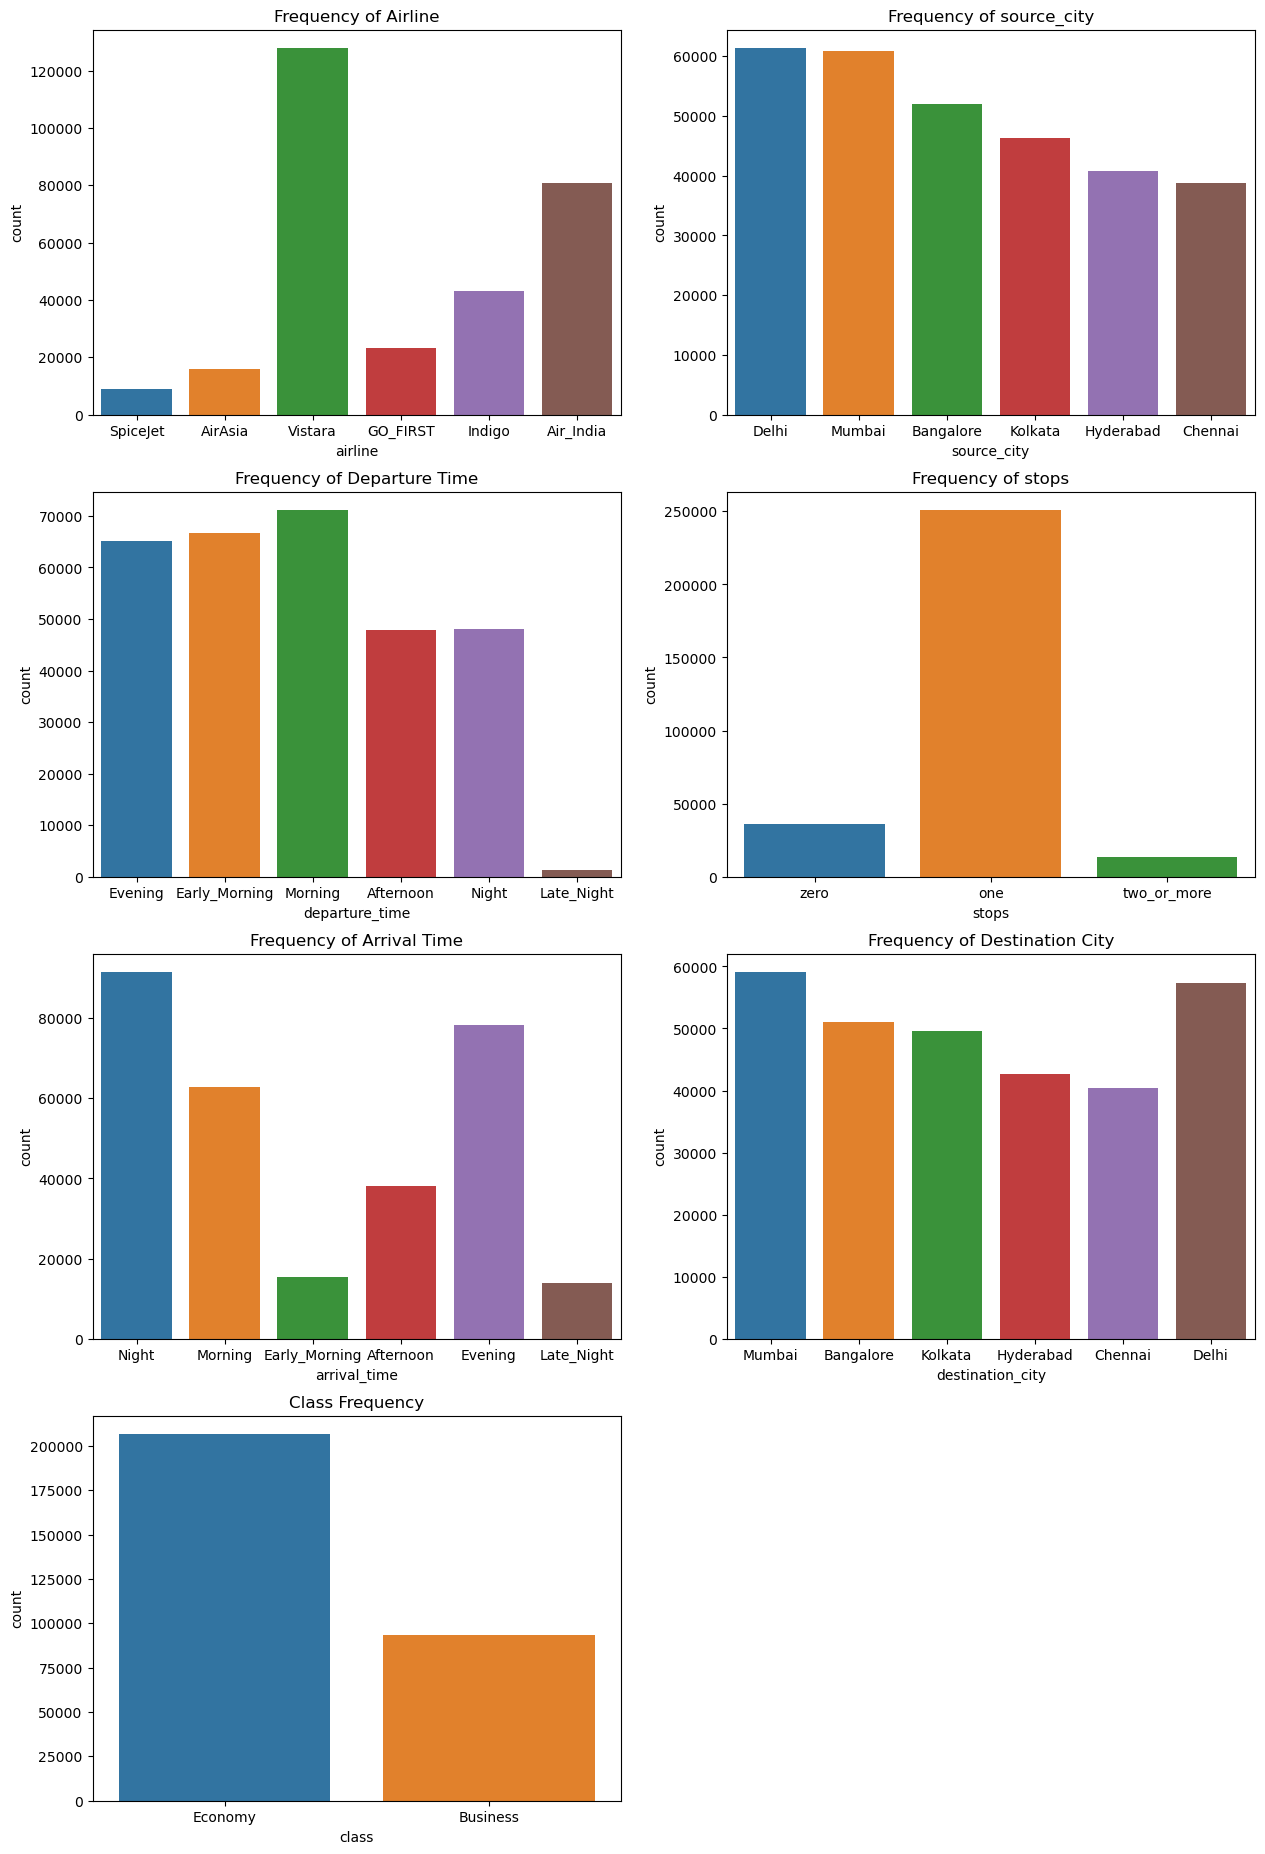

In [12]:
plt.figure(figsize=(15, 23))

plt.subplot(4, 2, 1)
sns.countplot(x=df['airline'], data=df)
plt.title("Frequency of Airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df['source_city'], data=df)
plt.title("Frequency of source_city")

plt.subplot(4, 2, 3)
sns.countplot(x=df['departure_time'], data=df)
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df['stops'], data=df)
plt.title("Frequency of stops")

plt.subplot(4, 2, 5)
sns.countplot(x=df['arrival_time'], data=df)
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df['destination_city'], data=df)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df['class'], data=df)
plt.title("Class Frequency")

plt.show()

# 4. Label Encoding (One-Hot Encoding)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["airline"] = le.fit_transform(df['airline'])
df["source_city"] = le.fit_transform(df['source_city'])
df["departure_time"] = le.fit_transform(df['departure_time'])
df["stops"] = le.fit_transform(df['stops'])
df["arrival_time"] = le.fit_transform(df['arrival_time'])
df["destination_city"] = le.fit_transform(df['destination_city'])
df["class"] = le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


# 5. Feature Selection

### Correlation Heatmap

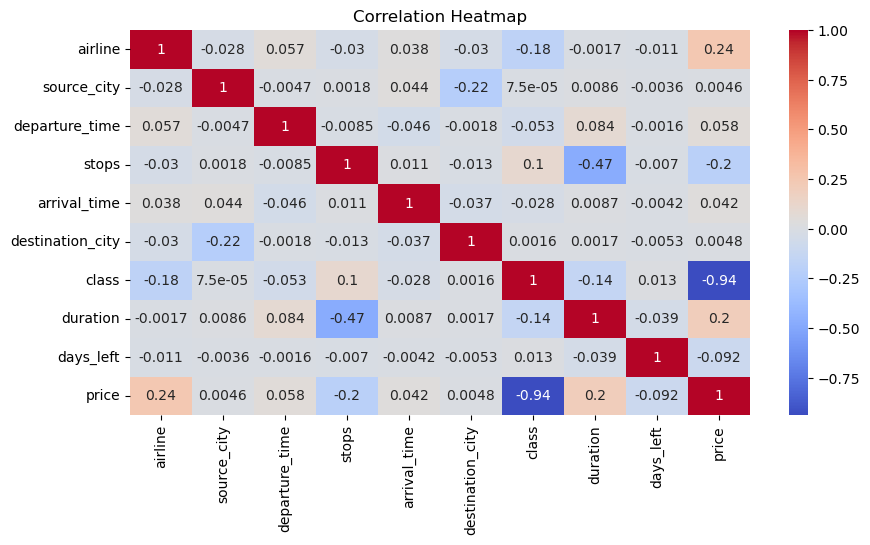

In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation and plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Variance Inflation Factor (VIF)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
print(vif_data)

            Feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [21]:
df = df.drop(columns=["stops"])

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
print(vif_data)

            Feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


# 6. Implementing ML Algorithms

### Linear Regression

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Handle unknown categories
    ]
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)  # Now ignores unknown categories

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)
y_pred_lr = lr.predict(X_test_preprocessed)

# Create a DataFrame to compare actual and predicted prices
difference = pd.DataFrame({
    "Actual_Value": y_test.reset_index(drop=True),
    "Predicted_Value": y_pred_lr
})
print(difference)

# Evaluate the model
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

       Actual_Value  Predicted_Value
0              7366      4730.006440
1             64831     55383.361089
2              6195     11327.195270
3             60160     52750.642490
4              6578      9956.305678
...             ...              ...
60026          5026      3872.765112
60027          3001      3774.737560
60028          6734      5364.371672
60029          5082      3478.859536
60030         66465     57464.035514

[60031 rows x 2 columns]
R2 Score: 0.914729997061546
MAE: 4264.8465548112235
RMSE: 6629.86990686384


C:\Users\jjk\AppData\Local\Temp\ipykernel_15192\3783940162.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label = 'Actual')
C:\Users\jjk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jjk\AppData\Local\Temp\ipykernel_15192\3783940162.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexib

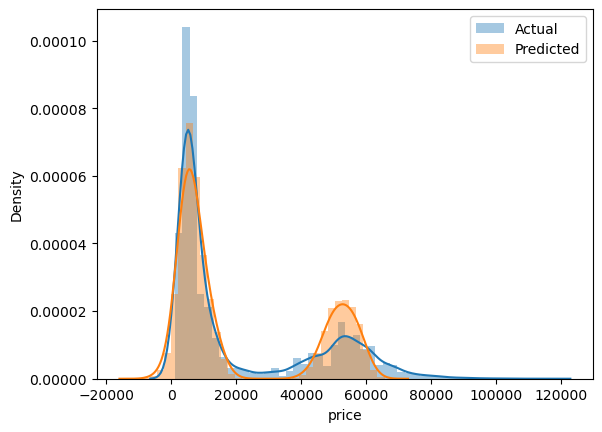

In [28]:
sns.distplot(y_test,label = 'Actual')
sns.distplot(y_pred_lr,label = 'Predicted')
plt.legend()

### Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# Preprocessing: Scale numerical features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the training and testing sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_preprocessed, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test_preprocessed)

# Evaluate the model
print("Decision Tree Metrics:")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree Metrics:
R2 Score: 0.9817423980679999
MAE: 926.0144841831722
RMSE: 3067.811948901503


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# Preprocessing: Scale numerical features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the training and testing sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_preprocessed, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test_preprocessed)

# Evaluate the model
print("Random Forest Metrics:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# 7. Plotting Actual vs Predicted Prices

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()